In [1]:
from datetime import date, datetime, timedelta
import yfinance as yfin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rnd_stuff.tr_approx as approx
import matplotlib as mpl

from bs4 import BeautifulSoup
import requests

import rnd_stuff.stonks.grab as grab

In [2]:
import logging
logging.basicConfig(level=logging.INFO)

In [3]:
logging.info('qwe')

INFO:root:qwe


In [4]:
gold_df = grab.gold()

INFO:rnd_stuff.stonks.grab:Reading year 1968
INFO:rnd_stuff.stonks.grab:Reading year 1969
INFO:rnd_stuff.stonks.grab:Reading year 1970
INFO:rnd_stuff.stonks.grab:Reading year 1971
INFO:rnd_stuff.stonks.grab:Reading year 1972
INFO:rnd_stuff.stonks.grab:Reading year 1973
INFO:rnd_stuff.stonks.grab:Reading year 1974
INFO:rnd_stuff.stonks.grab:Reading year 1975
INFO:rnd_stuff.stonks.grab:Reading year 1976
INFO:rnd_stuff.stonks.grab:Reading year 1977
INFO:rnd_stuff.stonks.grab:Reading year 1978
INFO:rnd_stuff.stonks.grab:Reading year 1979
INFO:rnd_stuff.stonks.grab:Reading year 1980
INFO:rnd_stuff.stonks.grab:Reading year 1981
INFO:rnd_stuff.stonks.grab:Reading year 1982
INFO:rnd_stuff.stonks.grab:Reading year 1983
INFO:rnd_stuff.stonks.grab:Reading year 1984
INFO:rnd_stuff.stonks.grab:Reading year 1985
INFO:rnd_stuff.stonks.grab:Reading year 1986
INFO:rnd_stuff.stonks.grab:Reading year 1987
INFO:rnd_stuff.stonks.grab:Reading year 1988
INFO:rnd_stuff.stonks.grab:Reading year 1989
INFO:rnd_s

In [5]:
gold_df

,price
1968-12-31,41.95
1968-12-30,42.00
1968-12-27,41.70
1968-12-24,41.70
1968-12-23,41.70
...,...
2022-01-10,1800.55
2022-01-07,1792.20
2022-01-06,1804.95
2022-01-05,1818.50


In [6]:
mpl.rcParams['figure.figsize'] = [18.0, 10.0]

In [7]:
df = pd.DataFrame()
df['gold'] = gold_df['price'].ffill().dropna()

In [8]:
df['gld'] = yfin.Ticker('GLD').history(period='max')['Close']

In [9]:
df = df.ffill().dropna()
df

,gold,gld
2004-12-31,438.00,43.799999
2004-12-30,435.15,43.830002
2004-12-29,443.50,43.660000
2004-12-24,442.20,43.660000
2004-12-23,442.40,44.270000
...,...,...
2022-01-10,1800.55,168.259995
2022-01-07,1792.20,167.750000
2022-01-06,1804.95,166.990005
2022-01-05,1818.50,169.059998


In [10]:
df.index

DatetimeIndex(['2004-12-31', '2004-12-30', '2004-12-29', '2004-12-24',
               '2004-12-23', '2004-12-22', '2004-12-21', '2004-12-20',
               '2004-12-17', '2004-12-16',
               ...
               '2022-01-17', '2022-01-14', '2022-01-13', '2022-01-12',
               '2022-01-11', '2022-01-10', '2022-01-07', '2022-01-06',
               '2022-01-05', '2022-01-04'],
              dtype='datetime64[ns]', length=4610, freq=None)

In [11]:
ret = (df/df.shift(365, freq='D')).dropna()
ret

,gold,gld
2005-01-04,1.021664,0.963046
2005-01-05,0.994159,0.961469
2005-01-06,1.012243,0.949752
2005-01-07,1.012078,0.942767
2005-01-11,0.986805,0.951104
...,...,...
2022-01-26,0.995683,0.977940
2022-01-27,0.983265,0.971482
2022-01-28,0.973120,0.967686
2022-02-01,0.972387,0.965563


<AxesSubplot:>

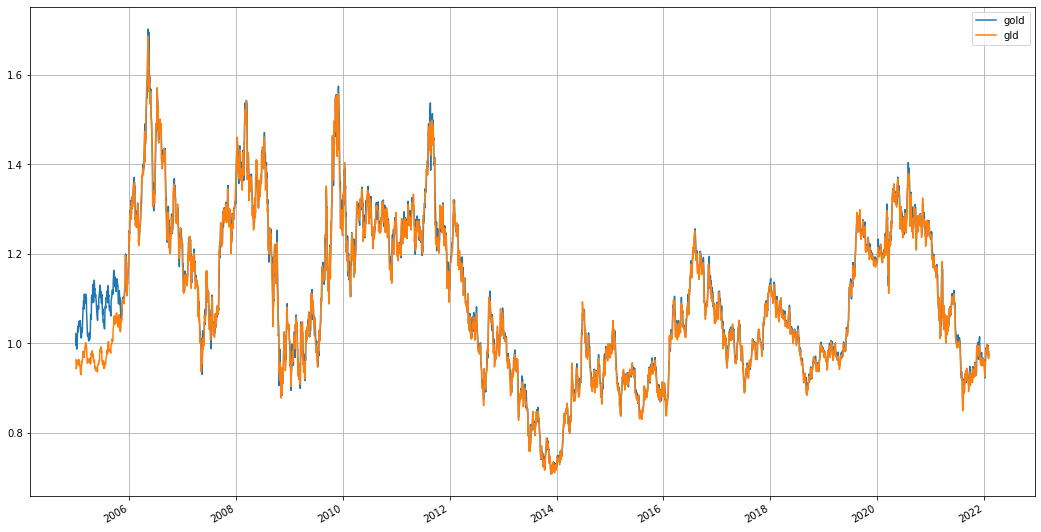

In [12]:
ret.plot(grid=True)